In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import sklearn
sklearn.__version__

'1.1.3'

In [4]:
pd.__version__

'2.0.3'

In [5]:
np.__version__

'1.23.5'

In [6]:
import scipy
scipy.__version__

'1.8.1'

In [7]:
%matplotlib inline

# Условия задачи

Пожалуйста, проанализируйте представленные данные (https://archive.ics.uci.edu/dataset/10/automobile) и ответьте на несколько
вопросов:
1. Придумайте и опишите наибольшее число вариантов использования этих данных. Для
решения каких практических задач их можно применить?
2. Выберите одну из описанных вами задач и реализуйте ее решение на Python / R при
помощи оптимальной на ваш взгляд модели. Опишите, почему вы выбрали именно эту
модель.
3. Опишите ваш подход к предварительному анализу (в т.ч. визуализации) и обработке
данных, работе с признаками, кросс валидацией, настройкой модели и ее оценкой.
Объясните выбор того или иного решения и, по возможности, сравните с
альтернативами.
4. Опишите, как бы вы улучшили модель из пункта 2, если бы у вас было больше времени
и существенно больший датасет.

# Описание датасета

1. symboling:                -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses:        continuous from 65 to 256.
3. make:                     
                           alfa-romero, audi, bmw, chevrolet, dodge, honda,
                           isuzu, jaguar, mazda, mercedes-benz, mercury,
                           mitsubishi, nissan, peugot, plymouth, porsche,
                           renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type:                diesel, gas.
5. aspiration:               std, turbo.
6. num-of-doors:             four, two.
7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:             4wd, fwd, rwd.
9. engine-location:          front, rear.
10. wheel-base:               continuous from 86.6 120.9.
11. length:                   continuous from 141.1 to 208.1.
12. width:                    continuous from 60.3 to 72.3.
13. height:                   continuous from 47.8 to 59.8.
14. curb-weight:              continuous from 1488 to 4066.
15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
17. engine-size:              continuous from 61 to 326.
18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore:                     continuous from 2.54 to 3.94.
20. stroke:                   continuous from 2.07 to 4.17.
21. compression-ratio:        continuous from 7 to 23.
22. horsepower:               continuous from 48 to 288.
23. peak-rpm:                 continuous from 4150 to 6600.
24. city-mpg:                 continuous from 13 to 49.
25. highway-mpg:              continuous from 16 to 54.
26. price:                    continuous from 5118 to 45400.

В описании датасета сказанно, что symboling (insurance risk rating, рейтинг страхового риска) является таргетом. symboling - целочисленная переменная, поэтому на этом датасете можно решать задачу многоклассовой классификации (-3, -2, -1, 0, 1, 2, 3). В датасете есть price (цена автомобиля) и с price в качестве таргета задача станет регрессия. В качестве таргета можно выбрать бинарную переменную, вроде fuel-type или engine-location и тогда задачей станет бинарная классификация, но построение модели предсказания таких величин кажется не целесообразным. Людей больше интересует определение актуальной цены или то, к какому страховому классу будет отнесен автомобиль, так как от этого зависит сумма страхового взноса.

# Загрузка данных

In [8]:
colnames = [
    "symboling",
    "normalized-losses",
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-type",
    "num-of-cylinders",
    "engine-size",
    "fuel-system",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price",
]

В данных присутствует значение "?", его нужно заменить на NaN

In [9]:
df = pd.read_csv("imports-85.data", names=colnames, na_values="?")

In [10]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,NaN,NaN,NaN,164.0,164.0
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [11]:
df.shape

(205, 26)

# Задача

Буду решать задачу предсказания цены на автомобиль - регрессию. Таргет - price.

# EDA

## Проверю типы переменных

In [12]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Некоторые переменные были автоматически определенны как float64, хотя у них целочисленные значения

In [13]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
len(df['make'].value_counts())

22

In [15]:
len(df['fuel-type'].value_counts())

2

In [16]:
len(df['aspiration'].value_counts())

2

In [17]:
len(df['num-of-doors'].value_counts())

2

In [18]:
len(df['body-style'].value_counts())

5

In [19]:
len(df['drive-wheels'].value_counts())

3

In [20]:
len(df['engine-location'].value_counts())

2

In [21]:
len(df['engine-type'].value_counts())

7

In [22]:
len(df['num-of-cylinders'].value_counts())

7

In [23]:
len(df['fuel-system'].value_counts())

8

In [24]:
len(df['symboling'].value_counts())

6

Итого:
- 11 категориальных переменных
- 14 числовых переменных
- 1 числовой таргет

## Поиск дубликатов в данных

In [25]:
df_duplicate = df.drop_duplicates()

In [26]:
df.shape[0] - df_duplicate.shape[0]

0

Итого:
- дубликатов в датасете нет

## Количество пропусков в данных

In [27]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

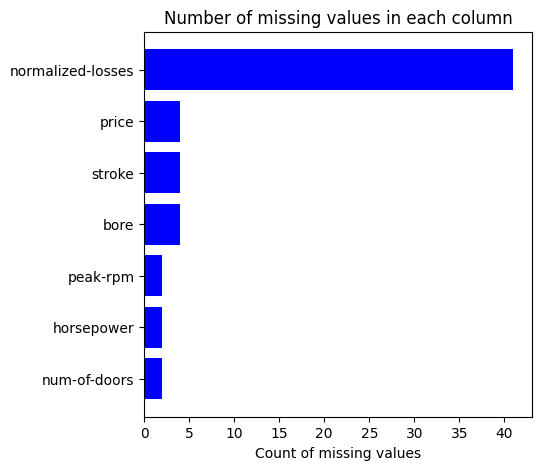

In [28]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[(missing_df['missing_count'] > 0), :]
missing_df = missing_df.sort_values(by='missing_count')
ind = range(missing_df.shape[0])

fig, ax = plt.subplots(figsize=(5,5))
rects = ax.barh(ind, missing_df['missing_count'], color="blue")
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

## Замена пропусков на среднее значение 

Так как price - это таргет, то строки с пропусками в price нужно выкинуть

In [29]:
df = df.dropna(subset=['price'])

Непрерывные значения можно заменить на среднее

In [30]:
price_mean = df['price'].mean().astype(int)
df['price'].fillna(value=price_mean, inplace=True)

In [31]:
price_mean

13207

In [32]:
bore_mean = df['bore'].mean().astype(float)
df['bore'].fillna(value=bore_mean, inplace=True)

In [33]:
bore_mean

3.330710659898477

In [34]:
stroke_mean = df['stroke'].mean().astype(float)
df['stroke'].fillna(value=stroke_mean, inplace=True)

In [35]:
stroke_mean

3.256903553299492

In [36]:
normalized_losses_mean = df['normalized-losses'].mean().astype(int)
df['normalized-losses'].fillna(value=normalized_losses_mean, inplace=True)

In [37]:
normalized_losses_mean

122

In [38]:
horsepower_mean = df['horsepower'].mean().astype(int)
df['horsepower'].fillna(value=horsepower_mean, inplace=True)

In [39]:
horsepower_mean

103

In [40]:
peak_rpm_mean = df['peak-rpm'].mean().astype(int)
df['peak-rpm'].fillna(value=peak_rpm_mean, inplace=True)

In [41]:
peak_rpm_mean

5117

Категориальные переменные можно заменить модой

In [42]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

In [43]:
num_of_door_mode = df['num-of-doors'].mode().values[0]
df['num-of-doors'].fillna(value=num_of_door_mode, inplace=True)

In [44]:
num_of_door_mode

'four'

In [45]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Анализ переменных

Вначале посмотрю что из себя представляют переменные сами по себе.

In [46]:
def countplot(x: pd.Series, title: str, figsize=(15,5), x_rotation=0, order_index=None) -> None:
    plt.figure(figsize=figsize)
    plt.xticks(rotation=x_rotation)
    ax = sns.countplot(x=x, color="red", order=order_index)
    ax.bar_label(ax.containers[0], size=10)
    ax.axes.yaxis.set_visible(False)
    for side in ["top", "left", "right"]:
        ax.spines[side].set_visible(False)
    ax.set_title(title, size=15)
    ax.set_xlabel("");

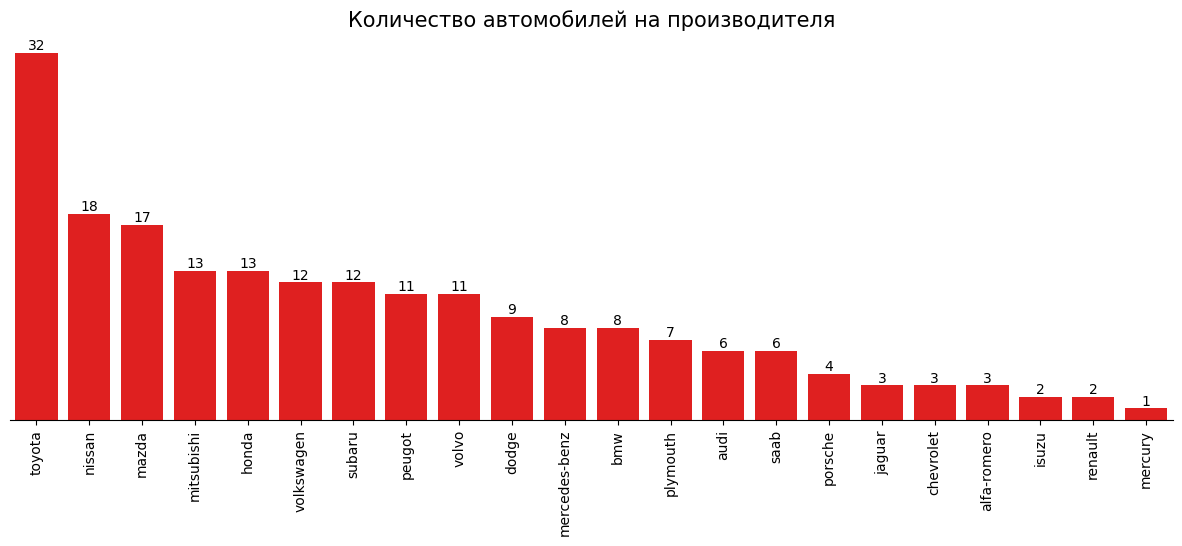

In [47]:
countplot(df['make'], "Количество автомобилей на производителя", x_rotation=90, order_index=df['make'].value_counts().index)

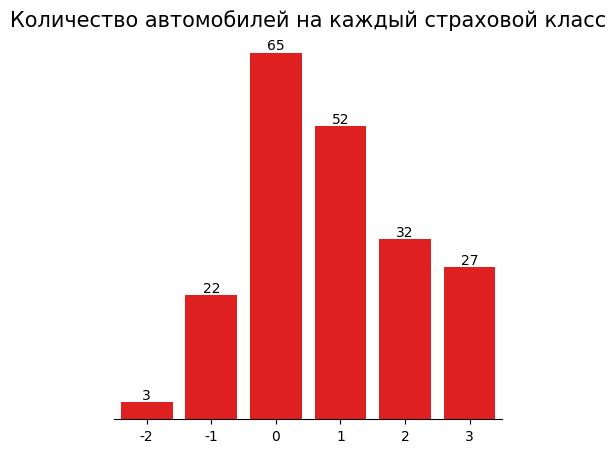

In [48]:
countplot(df['symboling'], "Количество автомобилей на каждый страховой класс", figsize=(5,5))

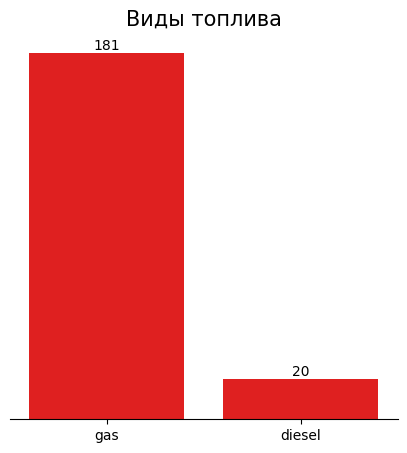

In [49]:
countplot(df['fuel-type'], "Виды топлива", figsize=(5,5))

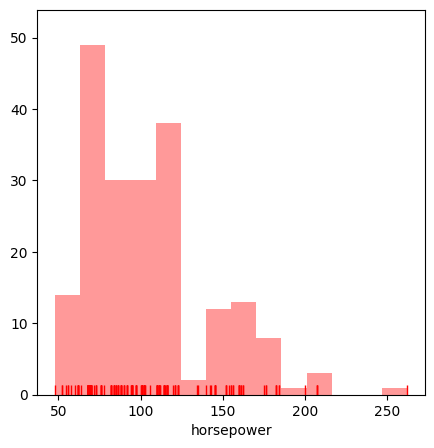

In [50]:
plt.figure(figsize=(5,5))
sns.distplot(df["horsepower"], kde=False, rug=True, color="red")
plt.show()

Можно удалить выбросы, оставив только значения в пределах 3х сигм

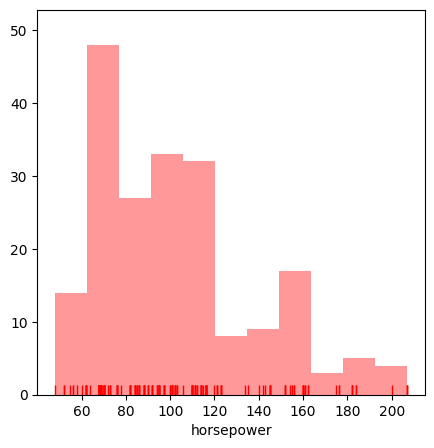

In [51]:
plt.figure(figsize=(5,5))
sns.distplot(df["horsepower"][np.abs(df["horsepower"]-df["horsepower"].mean()) <= (3*df["horsepower"].std())], kde=False, rug=True, color="red",)
plt.show()

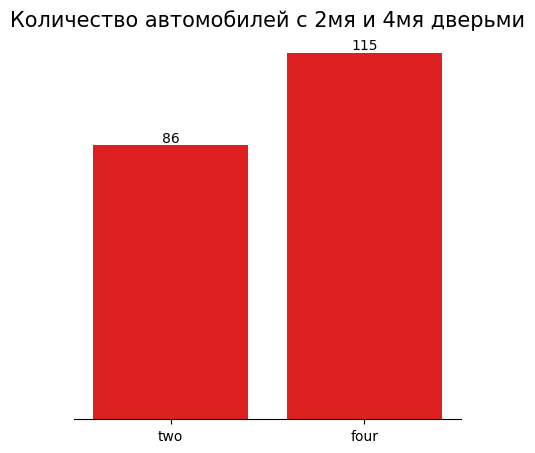

In [52]:
countplot(df['num-of-doors'], "Количество автомобилей с 2мя и 4мя дверьми", figsize=(5,5))

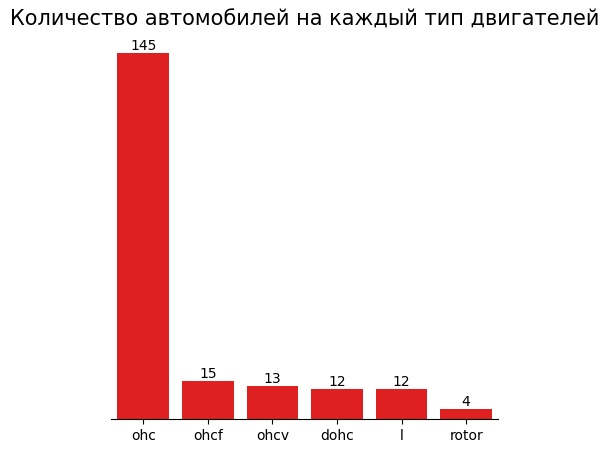

In [53]:
countplot(df['engine-type'], "Количество автомобилей на каждый тип двигателей", figsize=(5,5), order_index=df['engine-type'].value_counts().index)

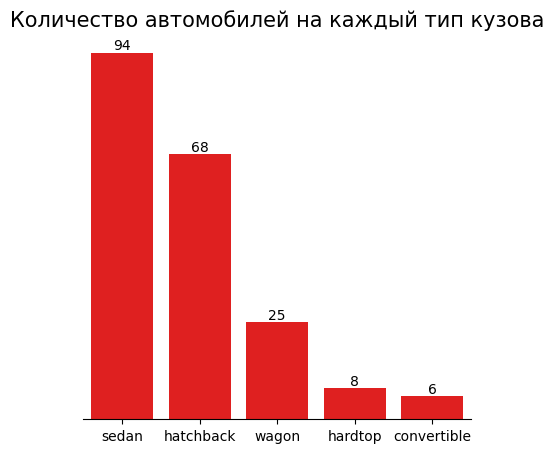

In [54]:
countplot(df['body-style'], "Количество автомобилей на каждый тип кузова", figsize=(5,5), order_index=df['body-style'].value_counts().index)

Итого:
- большая часть автомобилей представленны классами sedan и hatchback
- ohr - основной тип двигателей в датасете
- автомобили приемущественно используют в качестве топлива газ
- почти нет автомобилей, которые можно было бы назвать безопаснами и очень безопасными
- производители представленны не равномерно, 9 производителей имеют больше 10 автомобилей и много производителей предствленных всего несколькими образцами



## Совместный анализ нескольких переменных

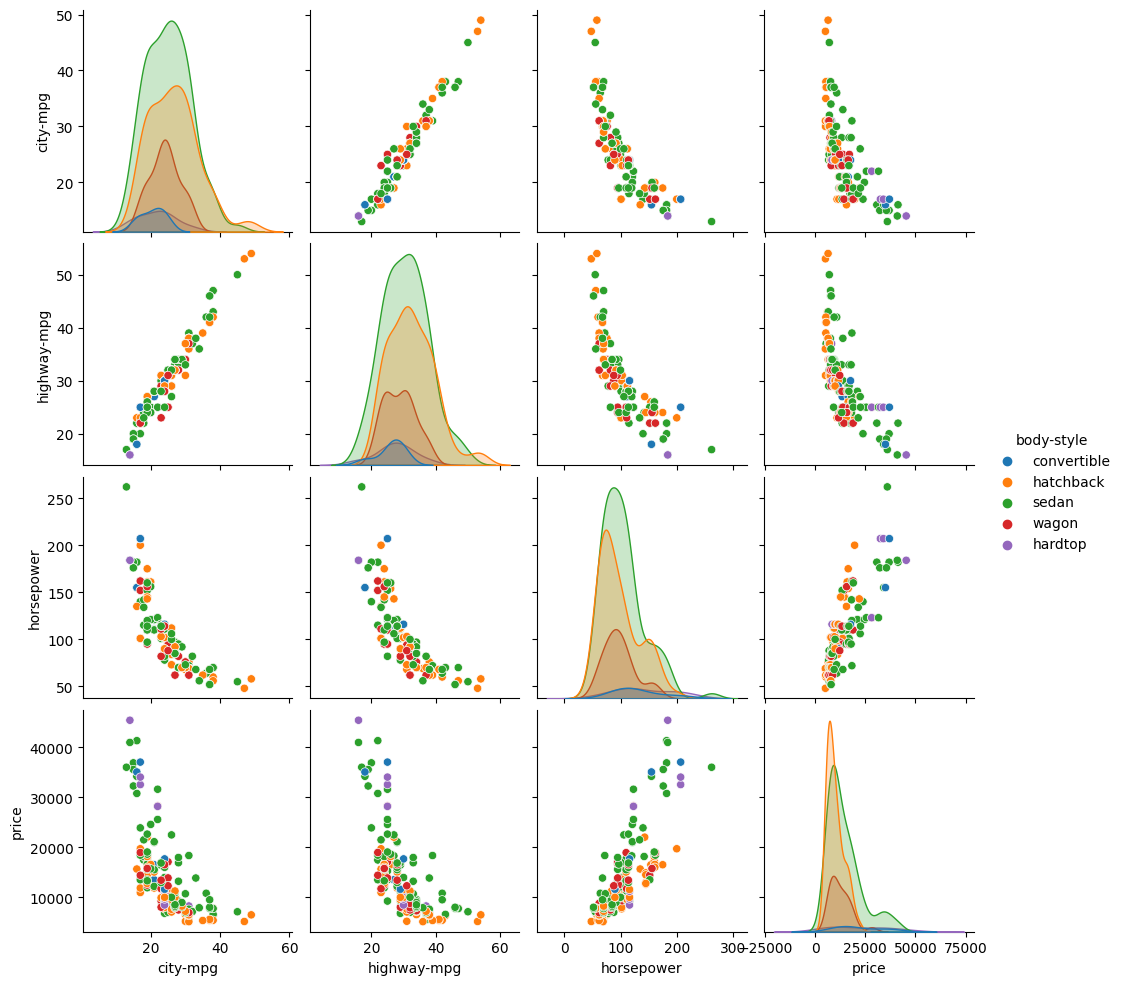

In [55]:
g = sns.pairplot(df[["city-mpg", "highway-mpg", "horsepower", 'body-style', "price", ]], hue='body-style')

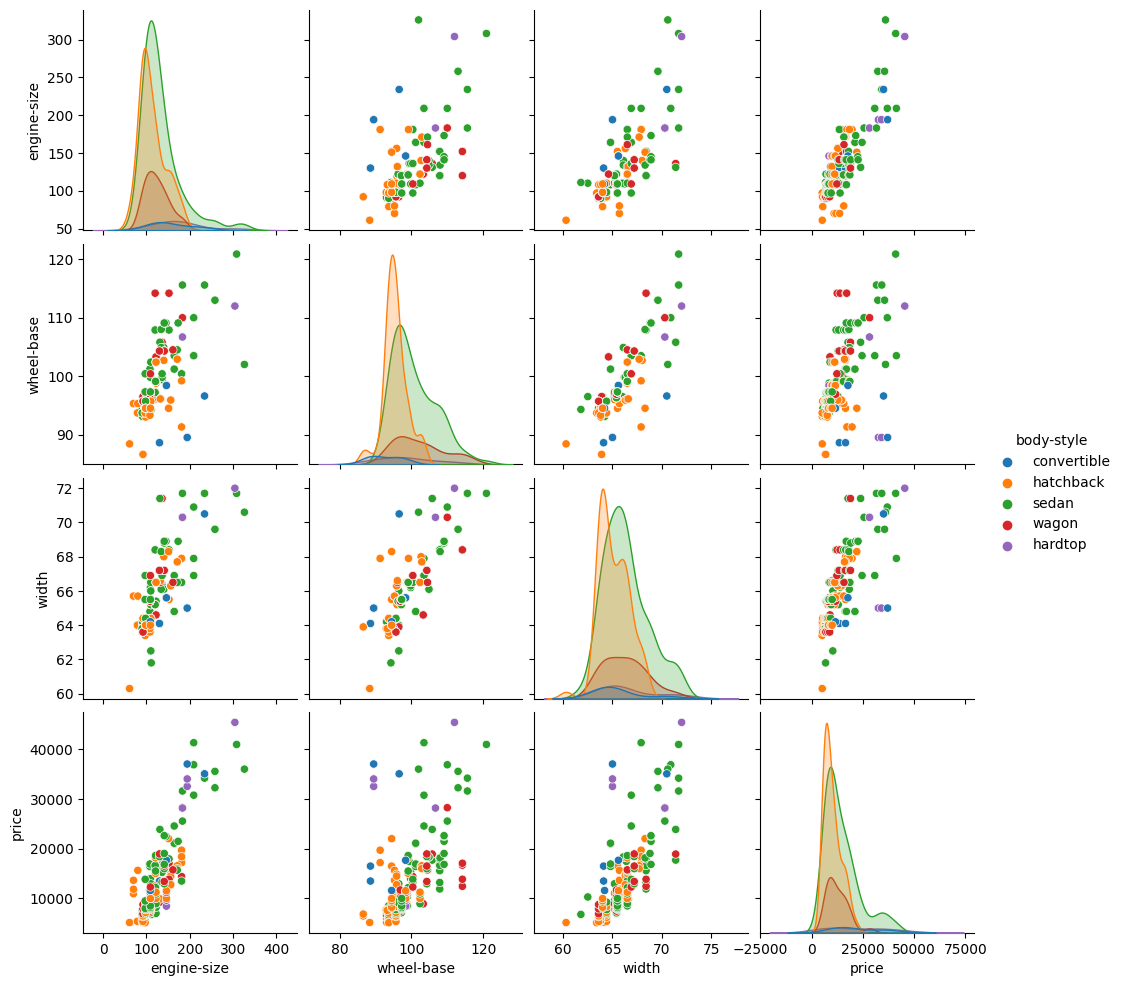

In [56]:
g = sns.pairplot(df[["engine-type", "engine-size", "fuel-system", "wheel-base", "width", 'body-style', "price", ]], hue='body-style')

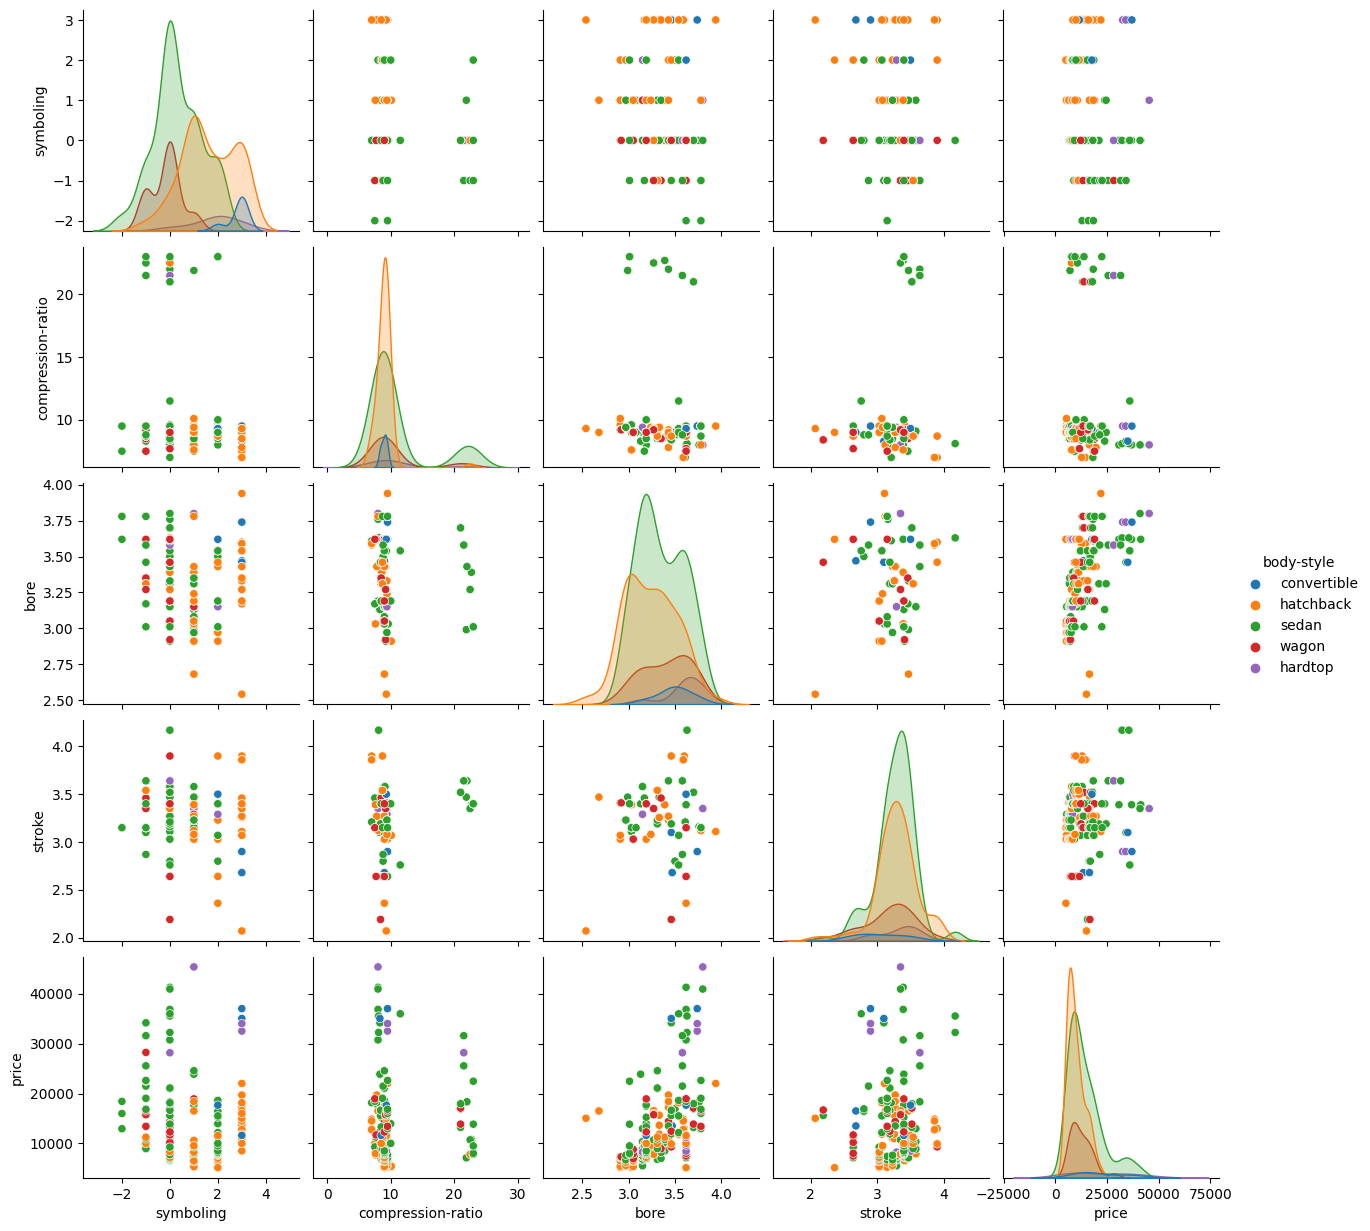

In [57]:
g = sns.pairplot(df[["symboling", "num-of-cylinders", "compression-ratio", "bore", "stroke", 'body-style', "price", ]], hue='body-style')

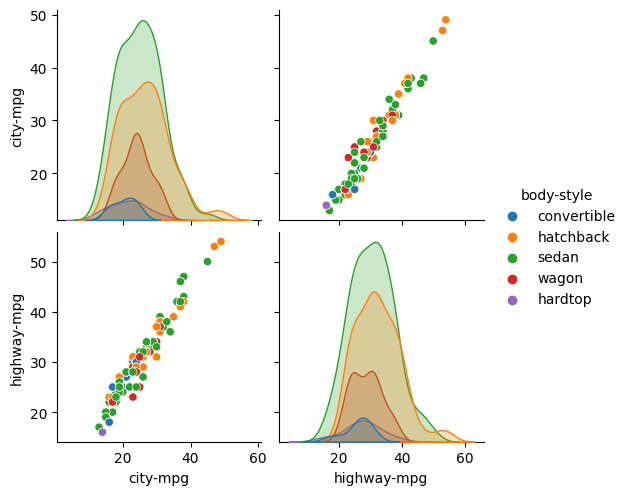

In [58]:
g = sns.pairplot(df[["city-mpg", "highway-mpg", 'body-style',]], hue='body-style')

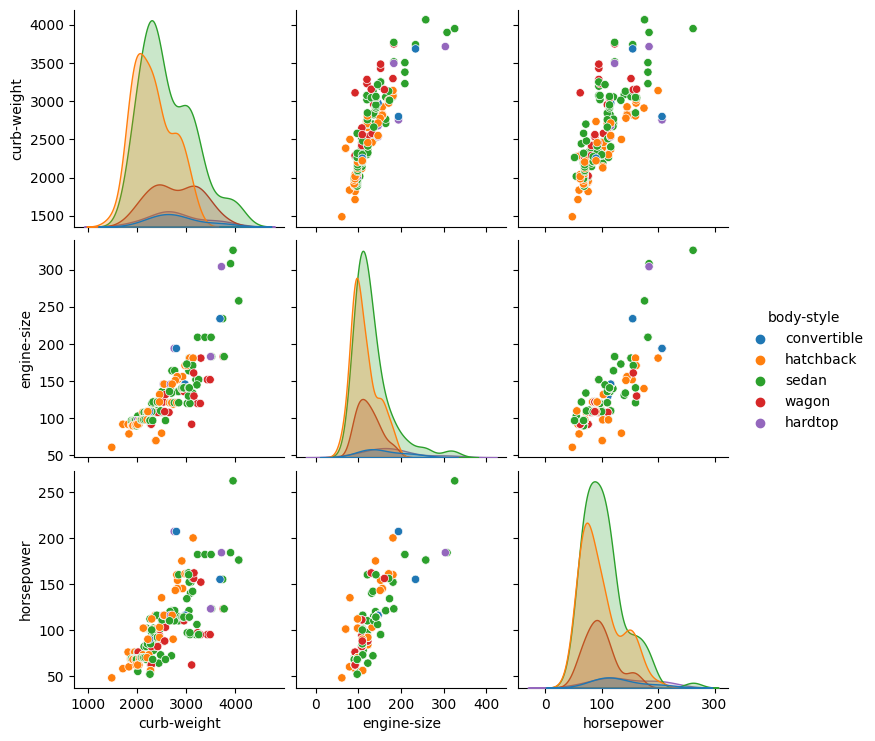

In [59]:
g = sns.pairplot(df[["curb-weight", "engine-size", "horsepower", 'body-style',]], hue='body-style')

Итого:
- чем дороже автомобиль, тем меньше у него расход топлива в городе
- чем дороже автомобиль, тем меньше у него расход топлива на шоссе
- между ценой за автомобиль и horsepower есть положительная корреляция
- между габаритами автомобиля и ценой есть положительная корреляция
- кажется что цена от класса страхования почти не зависит
- так же цена не очень сильно зависит от параметров двигателя - автомобили с одинаковыми значениями параметров двигателя можно найти во всех ценовых диапазонах

## Детальный анализ цены

нарисуем распределение цены

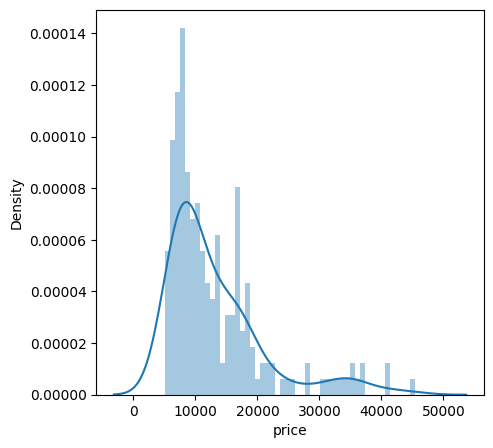

In [60]:
plt.figure(figsize=(5,5))
sns.distplot(df["price"].values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

нарисуем боксплоты для цены для каждого типа автомобилей

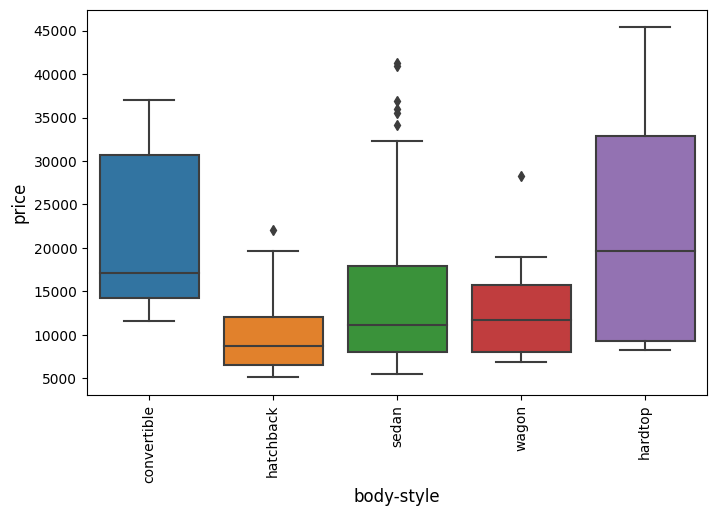

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='body-style', y='price', data=df)
plt.ylabel('price', fontsize=12)
plt.xlabel('body-style', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

- медиана цены для hatchback, sedan и wagon очень близки
- медиана цены для hardtop и convertible очень близки
- цены на sedan имеют больше всего выбросов

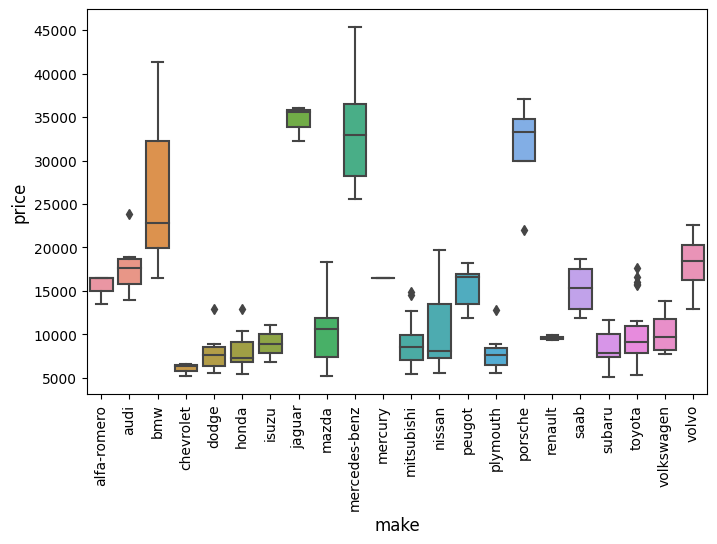

In [62]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='make', y='price', data=df)
plt.ylabel('price', fontsize=12)
plt.xlabel('make', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

- самая высокая медианная цена на автомобили марок bmw, jaguar, mercedes-benz, porsche
- цены на остальные марки автомобилей находятся на одинаковом низком уровне около 10000

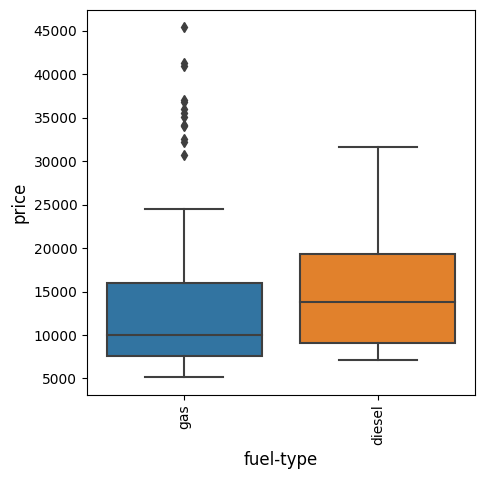

In [63]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='fuel-type', y='price', data=df)
plt.ylabel('price', fontsize=12)
plt.xlabel('fuel-type', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

- дизельные автомобили имеют более высокую медианную цену
- автомобили на газу имеют много выбросов, но меньший межквартильный размах чем дизильные

Посмотрим на зависимость цены от категории страхового риска

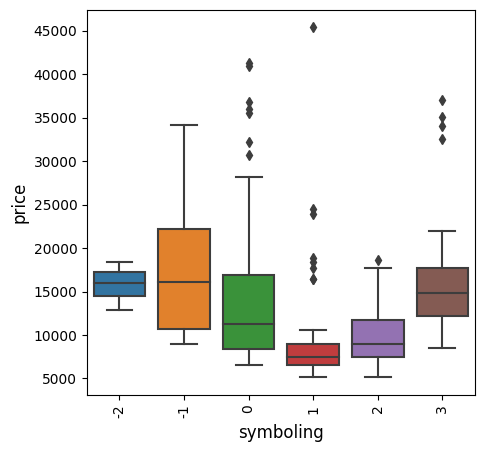

In [64]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='symboling', y='price', data=df)
plt.ylabel('price', fontsize=12)
plt.xlabel('symboling', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# Моделирование

In [68]:
df.shape

(201, 26)

Фиксируем сид

In [69]:
seed = 42

random.seed(seed)
np.random.seed(seed)

In [114]:
X = df.drop("price", axis=1).reset_index().drop("index", axis=1)

In [115]:
y = df["price"]

Стандартный train_test_split из sklearn хорошо подходит для задачи классификации, но для непрерывного таргета stratify уже не применить и нужно бинаризовать и семплить из бинов чтобы цены из разных частей распределения попали в оба датасета в нужной пропорции. Этот механизм уже реализован в библиотеке verstack.

In [116]:
from verstack.stratified_continuous_split import scsplit

In [131]:
X_train, X_val, y_train, y_val = scsplit(X, y, stratify=y, test_size=0.2, random_state=seed)

Нарисуем распределение цены для тренировочного и тестового датасета

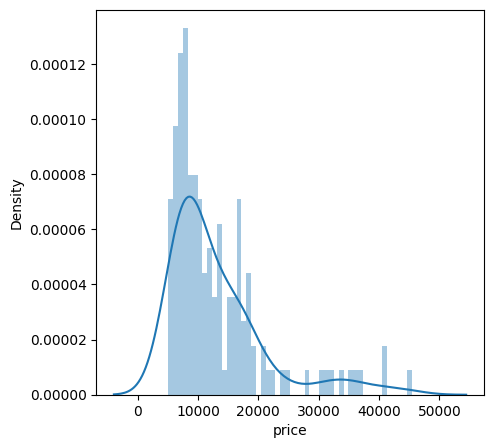

In [118]:
plt.figure(figsize=(5,5))
sns.distplot(y_train.values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

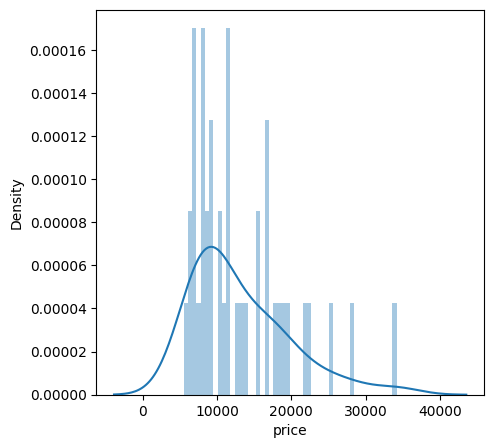

In [119]:
plt.figure(figsize=(5,5))
sns.distplot(y_val.values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

## Model 1 - LinearRegression

Сначала я попробую построить простую модель линейной регресси.

In [120]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [132]:
categorical_attributes = list(X_train.select_dtypes(include=['object']).columns)
categorical_attributes

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [133]:
numerical_attributes = list(X_train.select_dtypes(include=['float64', 'int64']).columns)
numerical_attributes

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

Для линейной модели важно чтобы все числовые фичи имели одинаковый масштаб, поэтому применю к ним StandardScaler. Категориальные фичи пока просто закодирую OneHotEncoder.

In [134]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_attributes),
    ('cat', OneHotEncoder(handle_unknown="infrequent_if_exist"), categorical_attributes),
])

In [136]:
X_train = full_pipeline.fit_transform(X_train)
X_val = full_pipeline.transform(X_val)

In [157]:
X_train.shape

(140, 72)

In [173]:
from sklearn.linear_model import LinearRegression

In [188]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train.to_numpy())

LinearRegression()

In [189]:
# посмотрим на ошибки наших предсказаний

scores = pd.DataFrame(y_val)

In [190]:
scores['predicted'] = lin_reg.predict(X_val)

In [191]:
scores['error'] = scores.price - scores.predicted

In [192]:
scores

,price,predicted,error
135,15510.0,1.364800e+04,1.862000e+03
153,6918.0,4.888000e+03,2.030000e+03
155,8778.0,9.856000e+03,-1.078000e+03
130,9295.0,8.520000e+03,7.750000e+02
204,22625.0,1.924000e+04,3.385000e+03
185,8195.0,9.376000e+03,-1.181000e+03
95,7799.0,6.728000e+03,1.071000e+03
19,6295.0,-1.451242e+16,1.451242e+16
89,5499.0,6.952000e+03,-1.453000e+03
71,34184.0,3.860800e+04,-4.424000e+03


In [200]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error

from sklearn.utils import check_array


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_array(y_true), check_array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [201]:
mean_absolute_error(scores['price'], scores['predicted'])

677029759977160.2

In [202]:
mean_squared_error(scores['price'], scores['predicted'])

6.826129022894655e+30

In [203]:
mean_absolute_percentage_error(scores[['price']], scores[['predicted']])

8019364879300.847

- Для простой линейной регрессии не получилось построить модель
- метрики показываю запредельную ошибку
- возможно это связанно с тем что из-за применения OneHotEncoder количество параметров сопостовимо с с количеством примеров - X_train.shape=(140, 72)

Сначала попробую применить регуляризованную линейную регрессию

## Model 2 - ElasticNet

In [205]:
from sklearn.linear_model import ElasticNet

In [206]:
lin_reg = ElasticNet()
lin_reg.fit(X_train, y_train.to_numpy())

ElasticNet()

In [207]:
# посмотрим на ошибки наших предсказаний

scores = pd.DataFrame(y_val)

In [208]:
scores['predicted'] = lin_reg.predict(X_val)

In [209]:
scores['error'] = scores.price - scores.predicted

In [210]:
scores

,price,predicted,error
135,15510.0,14479.621717,1030.378283
153,6918.0,6443.600159,474.399841
155,8778.0,8769.680754,8.319246
130,9295.0,12395.302033,-3100.302033
204,22625.0,18561.202026,4063.797974
185,8195.0,10101.660929,-1906.660929
95,7799.0,6664.525261,1134.474739
19,6295.0,5535.573753,759.426247
89,5499.0,6880.578557,-1381.578557
71,34184.0,29484.235618,4699.764382


In [211]:
scores['error'].describe()

count      41.000000
mean     -143.025533
std      2331.430517
min     -4345.710327
25%     -1792.397689
50%      -425.078139
75%      1134.474739
max      5017.675088
Name: error, dtype: float64

In [216]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

from sklearn.utils import check_array


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_array(y_true), check_array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [213]:
mean_absolute_error(scores['price'], scores['predicted'])

1863.3429423278058

In [214]:
mean_squared_error(scores['price'], scores['predicted'])

5323449.724641932

In [215]:
mean_absolute_percentage_error(scores[['price']], scores[['predicted']])

14.852777679593204

- mean_absolute_error = 1863
- в процентах ошибка не превышает 14.9% от цены

Можно понизить размерность датасете заменив OneHotEncoder на FrequencyEncoder

## Model 3 - LinearRegression + FrequencyEncoder

Все категориальные переменные нужно закодировать. OneHot кодирование - простой способ, но не самый эффективный.
Воспользуюсь частотным кодированием FrequencyEncoder.

In [230]:
X_train, X_val, y_train, y_val = scsplit(X, y, stratify=y, test_size=0.2, random_state=seed)

In [231]:
from verstack import FrequencyEncoder

In [232]:
fe_make = FrequencyEncoder()
fe_fuel_type = FrequencyEncoder()
fe_symboling = FrequencyEncoder()
fe_aspiration = FrequencyEncoder()
fe_num_of_doors = FrequencyEncoder()
fe_body_style = FrequencyEncoder()
fe_drive_wheels = FrequencyEncoder()
fe_engine_location = FrequencyEncoder()
fe_engine_type = FrequencyEncoder()
fe_num_of_cylinders = FrequencyEncoder()
fe_fuel_system = FrequencyEncoder()

In [233]:
X_train = fe_make.fit_transform(X_train, 'make')
X_train = fe_fuel_type.fit_transform(X_train, 'fuel-type')
X_train = fe_symboling.fit_transform(X_train, 'symboling')
X_train = fe_aspiration.fit_transform(X_train, 'aspiration')
X_train = fe_num_of_doors.fit_transform(X_train, 'num-of-doors')
X_train = fe_body_style.fit_transform(X_train, 'body-style')
X_train = fe_drive_wheels.fit_transform(X_train, 'drive-wheels')
X_train = fe_engine_location.fit_transform(X_train, 'engine-location')
X_train = fe_engine_type.fit_transform(X_train, 'engine-type')
X_train = fe_num_of_cylinders.fit_transform(X_train, 'num-of-cylinders')
X_train = fe_fuel_system.fit_transform(X_train, 'fuel-system')

In [234]:
X_val = fe_make.transform(X_val)
X_val = fe_fuel_type.transform(X_val)
X_val = fe_symboling.transform(X_val)
X_val = fe_aspiration.transform(X_val)
X_val = fe_num_of_doors.transform(X_val)
X_val = fe_body_style.transform(X_val)
X_val = fe_drive_wheels.transform(X_val)
X_val = fe_engine_location.transform(X_val)
X_val = fe_engine_type.transform(X_val)
X_val = fe_num_of_cylinders.transform(X_val)
X_val = fe_fuel_system.transform(X_val)

     . Filling unknown categories with most common frequency


In [235]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_attributes),
])

In [236]:
X_train = full_pipeline.fit_transform(X_train)
X_val = full_pipeline.transform(X_val)

In [237]:
X_train.shape

(140, 15)

In [265]:
# lin_reg = ElasticNet()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train.to_numpy())

LinearRegression()

In [266]:
# посмотрим на ошибки наших предсказаний

scores = pd.DataFrame(y_val)

In [267]:
scores['predicted'] = lin_reg.predict(X_val)

In [268]:
scores['error'] = scores.price - scores.predicted

In [269]:
scores

,price,predicted,error
135,15510.0,13651.508847,1858.491153
153,6918.0,6756.884524,161.115476
155,8778.0,8182.981696,595.018304
130,9295.0,11986.632205,-2691.632205
204,22625.0,18322.145165,4302.854835
185,8195.0,10036.827808,-1841.827808
95,7799.0,6263.089932,1535.910068
19,6295.0,5821.282433,473.717567
89,5499.0,6442.676574,-943.676574
71,34184.0,31854.969050,2329.030950


In [270]:
scores['error'].describe()

count      41.000000
mean      -18.682480
std      2510.023894
min     -5310.423553
25%     -1802.329429
50%      -209.977707
75%      1572.822087
max      5008.860304
Name: error, dtype: float64

In [271]:
mean_absolute_error(scores['price'], scores['predicted'])

2021.1939964362111

In [272]:
mean_squared_error(scores['price'], scores['predicted'])

6146905.083887149

In [273]:
mean_absolute_percentage_error(scores[['price']], scores[['predicted']])

16.089838890901927

- ElasticNet: mean_absolute_error=2146, mean_absolute_percentage_error=16.7%
- стала обучаться простая LinearRegression и она показала результат лучше чем ElasticNet
- mean_absolute_error = 2021
- в процентах ошибка не превышает 16% от цены

## Model 4 - xgboost + FrequencyEncoder

Я буду строить модель xgboost. Для деревянной модели не нужно стандартизировать непрерывные переменные. 

In [274]:
from verstack import FrequencyEncoder

In [275]:
X_train, X_val, y_train, y_val = scsplit(X, y, stratify=y, test_size=0.2, random_state=seed)

In [276]:
fe_make = FrequencyEncoder()
fe_fuel_type = FrequencyEncoder()
fe_symboling = FrequencyEncoder()
fe_aspiration = FrequencyEncoder()
fe_num_of_doors = FrequencyEncoder()
fe_body_style = FrequencyEncoder()
fe_drive_wheels = FrequencyEncoder()
fe_engine_location = FrequencyEncoder()
fe_engine_type = FrequencyEncoder()
fe_num_of_cylinders = FrequencyEncoder()
fe_fuel_system = FrequencyEncoder()

In [277]:
X_train = fe_make.fit_transform(X_train, 'make')
X_train = fe_fuel_type.fit_transform(X_train, 'fuel-type')
X_train = fe_symboling.fit_transform(X_train, 'symboling')
X_train = fe_aspiration.fit_transform(X_train, 'aspiration')
X_train = fe_num_of_doors.fit_transform(X_train, 'num-of-doors')
X_train = fe_body_style.fit_transform(X_train, 'body-style')
X_train = fe_drive_wheels.fit_transform(X_train, 'drive-wheels')
X_train = fe_engine_location.fit_transform(X_train, 'engine-location')
X_train = fe_engine_type.fit_transform(X_train, 'engine-type')
X_train = fe_num_of_cylinders.fit_transform(X_train, 'num-of-cylinders')
X_train = fe_fuel_system.fit_transform(X_train, 'fuel-system')

In [278]:
X_train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
159,0.271429,168.0,0.157143,0.907143,0.828571,0.421429,0.485714,0.371429,0.992857,94.5,...,0.764286,98,0.335714,3.19,3.03,9.0,70.0,4800.0,29,34
115,0.271429,119.0,0.036429,0.907143,0.828571,0.421429,0.328571,0.585714,0.992857,93.7,...,0.764286,90,0.335714,2.97,3.23,9.4,68.0,5500.0,37,41
46,0.321429,122.0,0.014286,0.907143,0.828571,0.421429,0.485714,0.371429,0.992857,102.0,...,0.007857,326,0.464286,3.54,2.76,11.5,262.0,5000.0,13,17
146,0.271429,87.0,0.157143,0.907143,0.828571,0.421429,0.328571,0.585714,0.992857,95.7,...,0.764286,92,0.335714,3.05,3.03,9.0,62.0,4800.0,35,39
135,0.164286,83.0,0.071429,0.907143,0.828571,0.421429,0.328571,0.585714,0.992857,93.7,...,0.764286,108,0.335714,3.62,2.64,8.7,73.0,4400.0,26,31


нужно еще закодировать проверочный датасет

In [279]:
X_val = fe_make.transform(X_val)
X_val = fe_fuel_type.transform(X_val)
X_val = fe_symboling.transform(X_val)
X_val = fe_aspiration.transform(X_val)
X_val = fe_num_of_doors.transform(X_val)
X_val = fe_body_style.transform(X_val)
X_val = fe_drive_wheels.transform(X_val)
X_val = fe_engine_location.transform(X_val)
X_val = fe_engine_type.transform(X_val)
X_val = fe_num_of_cylinders.transform(X_val)
X_val = fe_fuel_system.transform(X_val)

     . Filling unknown categories with most common frequency


In [280]:
X_val.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
131,0.164286,104.0,0.028571,0.907143,0.828571,0.578571,0.485714,0.585714,0.992857,99.1,...,0.764286,121,0.464286,3.54,3.07,9.3,110.0,5250.0,21,28
149,0.321429,77.0,0.157143,0.907143,0.828571,0.578571,0.121429,0.585714,0.992857,95.7,...,0.764286,92,0.335714,3.05,3.03,9.0,62.0,4800.0,31,37
151,0.321429,91.0,0.157143,0.907143,0.828571,0.578571,0.121429,0.042857,0.992857,95.7,...,0.764286,92,0.335714,3.05,3.03,9.0,62.0,4800.0,27,32
126,0.321429,122.0,0.007857,0.907143,0.828571,0.578571,0.121429,0.585714,0.992857,96.1,...,0.764286,132,0.464286,3.46,3.90,8.7,103.0,5117.0,23,31
200,0.092857,95.0,0.057857,0.907143,0.171429,0.578571,0.485714,0.371429,0.992857,109.1,...,0.764286,141,0.464286,3.78,3.15,9.5,114.0,5400.0,19,25


In [281]:
import xgboost as xgb

In [282]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [283]:
# создадим данные для обучения и валидации

xgb_train = xgb.DMatrix(X_train, y_train)
xgb_test = xgb.DMatrix(X_val, y_val)

In [284]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [285]:
model = xgb.train(
    params=xgb_params,
    dtrain=xgb_train, 
    num_boost_round=2000, 
    evals=evallist, 
    early_stopping_rounds=20, 
    verbose_eval=100
)

[06:49:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:32] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	eval-rmse:13919.84100	train-rmse:14680.24702
[100]	eval-rmse:2161.83285	train-rmse:887.75027
[200]	eval-rmse:2155.75429	train-rmse:449.75693
[300]	eval-rmse:2158.68292	train-rmse:302.27077
[400]	eval-rmse:2157.20321	train-rmse:232.64913
[500]	eval-rmse:2156.19077	train-rmse:188.44679
[600]	eval-rmse:2149.77980	train-rmse:163.63286
[700]	eval-rmse:2154.76828	train-rmse:148.55010
[800]	eval-rmse:2152.77897	train-rmse:140.23023
[900]	eval-rmse:2151.59620	train-rmse:133.83265
[1000]	eval-rmse:2151.10091	train-rmse:128.88203
[1100]	eval-rmse:2145.57296	train-rmse:125.71574
[1200]	eval-rmse:2150.35512	train-rmse:123.42756
[1300]	eval-rmse:2151.06563	train-rmse:122.24855
[1382]	eval-rmse:2149.00907	train-rmse:121.48207


In [290]:
# посмотрим на ошибки наших предсказаний

scores = pd.DataFrame(y_val)

In [292]:
scores['predicted'] = model.predict(xgb_test)

In [293]:
scores['error'] = scores.price - scores.predicted

In [294]:
scores

,price,predicted,error
135,15510.0,13540.326172,1969.673828
153,6918.0,7819.122559,-901.122559
155,8778.0,11890.681641,-3112.681641
130,9295.0,10657.002930,-1362.002930
204,22625.0,19052.041016,3572.958984
185,8195.0,8249.504883,-54.504883
95,7799.0,7517.081543,281.918457
19,6295.0,5291.997070,1003.002930
89,5499.0,6700.684570,-1201.684570
71,34184.0,36369.382812,-2185.382812


In [295]:
scores['error'].describe()

count      41.000000
mean      109.963450
std      2172.812870
min     -5331.654297
25%     -1010.611328
50%      -245.855469
75%      1211.591797
max      5831.234375
Name: error, dtype: float64

In [296]:
mean_absolute_error(scores['price'], scores['predicted'])

1551.9048089748476

In [297]:
mean_squared_error(scores['price'], scores['predicted'])

4618058.5617489405

In [298]:
mean_absolute_percentage_error(scores[['price']], scores[['predicted']])

11.206561091478525

- mean_absolute_error = 1551
- в процентах ошибка не превышает 11.2% от цены
- это 3.8% выигрыш по сравнению с линейной моделью

# Post analysis 

In [299]:
from xgboost import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

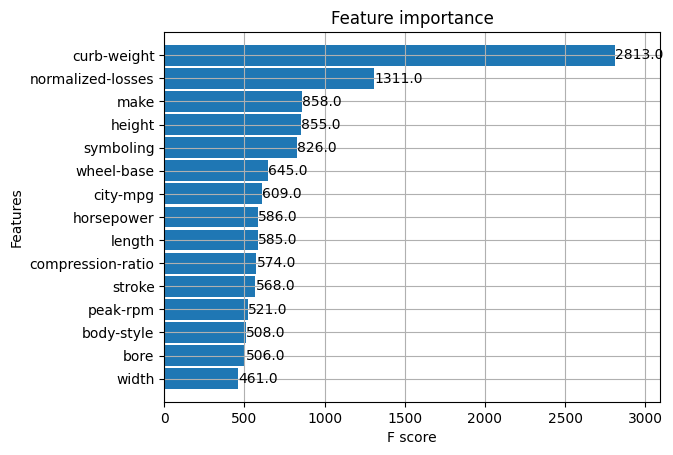

In [300]:
# посмотрим на важность фичей

plot_importance(model, max_num_features=15, height=0.9)